In [ ]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 2.0.0+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
!git clone https://github.com/roboflow-ai/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 8443, done.
remote: Total 8443 (delta 0), reused 0 (delta 0), pack-reused 8443
Receiving objects: 100% (8443/8443), 6.89 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (5825/5825), done.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HPsUXqdcfrZ0MwCmTz6m")
project = rf.workspace("tarun-kumar-bogireddy-otnmg").project("ship-7lfsp")
dataset = project.version(2).download("darknet")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 685.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 514.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=7c5d9bb0c0563b186f4a8b462c6f609c4dd4ead5ca76e4907d06feeba5b7b66e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
  

loading Roboflow workspace...
loading Roboflow project...

In [ ]:
%cd train

In [ ]:
%ls

In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
%cat train_images_roboflow.txt

In [ ]:
%cd ../../valid

In [ ]:
%mkdir labels
%mkdir images 

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

##Setting up Model Config

In [ ]:
%cd ../../yolov3/data

In [ ]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

In [ ]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
# display updated number of classes
%cat roboflow.data

classes=12
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


##Training the model

In [ ]:
%cd ../

/content/yolov3


In [ ]:
!python3 train.py --data data/roboflow.data --epochs 100

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/roboflow.data', device='', epochs=300, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2372      0 --:--:-- --:--:-- --:--:--  2372
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  240M    0  240M    0     0  33.3M      0 --:--:--  0:00:07 --:--:-- 39.9M
Caching labels (2

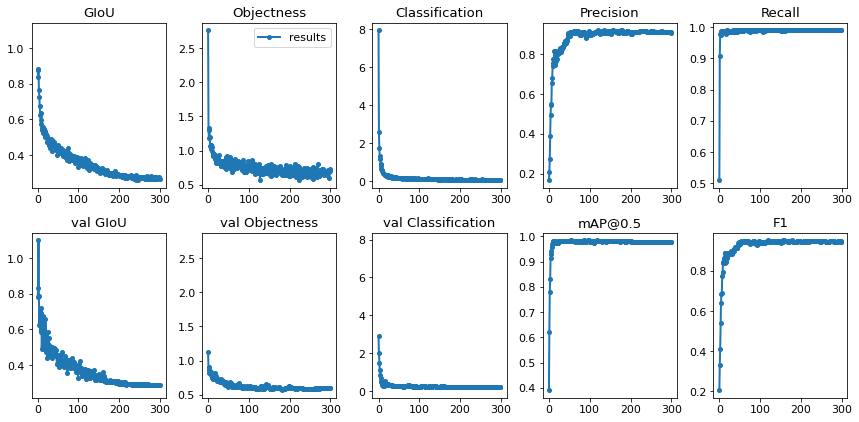

In [ ]:
from utils import utils; utils.plot_results()

##Display Results

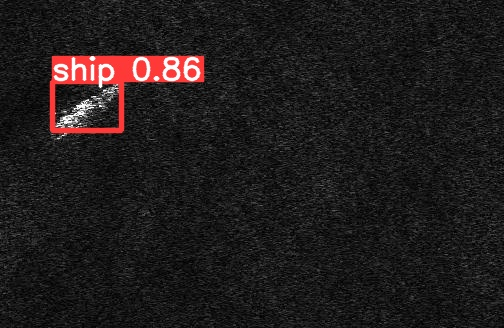

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/000723_jpg.rf.6c17506632f682207944d06d69bb6ea2.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")